In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [107]:
df = pd.read_csv('Dataset/flight_delays_train.csv.zip', compression='zip')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [109]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [110]:
df.sample(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
61450,c-1,c-22,c-7,1626,UA,LAX,LAS,236,N
32225,c-9,c-13,c-3,851,WN,MCO,PHL,861,N
28388,c-1,c-25,c-3,727,XE,IAH,MOB,427,N
94126,c-2,c-15,c-3,1426,DL,MCO,ATL,403,N
23985,c-8,c-13,c-7,2021,AA,ORD,SJC,1829,N
79464,c-10,c-16,c-1,36,CO,EWR,IAH,1400,Y
22301,c-6,c-13,c-2,1318,F9,LAS,DEN,629,N
31831,c-12,c-8,c-4,1708,OH,BOS,JFK,187,N
49586,c-5,c-15,c-1,1810,WN,GEG,BOI,287,N
81510,c-3,c-24,c-4,1001,OO,CEC,SFO,304,N


In [111]:
df['dep_delayed_int'] = df['dep_delayed_15min'] == 'Y'

In [112]:
aux = df
aux[['letter', 'Month']] = df['Month'].str.split('-', 1, expand=True)
aux

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,dep_delayed_int,letter
0,8,c-21,c-7,1934,AA,ATL,DFW,732,N,False,c
1,4,c-20,c-3,1548,US,PIT,MCO,834,N,False,c
2,9,c-2,c-5,1422,XE,RDU,CLE,416,N,False,c
3,11,c-25,c-6,1015,OO,DEN,MEM,872,N,False,c
4,10,c-7,c-6,1828,WN,MDW,OMA,423,Y,True,c
...,...,...,...,...,...,...,...,...,...,...,...
99995,5,c-4,c-3,1618,OO,SFO,RDD,199,N,False,c
99996,1,c-18,c-3,804,CO,EWR,DAB,884,N,False,c
99997,1,c-24,c-2,1901,NW,DTW,IAH,1076,N,False,c
99998,4,c-27,c-4,1515,MQ,DFW,GGG,140,N,False,c


In [113]:
aux['Month'] = pd.to_numeric(aux['Month'])

In [114]:
df['Month'] = aux['Month']

In [115]:
aux = df
aux[['letter', 'DayOfWeek']] = df['DayOfWeek'].str.split('-', 1, expand=True)
aux['DayOfWeek'] = pd.to_numeric(aux['DayOfWeek'])
df['DayOfWeek'] = aux['DayOfWeek']

aux = df
aux[['letter', 'DayofMonth']] = df['DayofMonth'].str.split('-', 1, expand=True)
aux['DayofMonth'] = pd.to_numeric(aux['DayofMonth'])
df['DayofMonth'] = aux['DayofMonth']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  int64 
 1   DayofMonth         100000 non-null  int64 
 2   DayOfWeek          100000 non-null  int64 
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
 9   dep_delayed_int    100000 non-null  bool  
 10  letter             100000 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 7.7+ MB


[Text(61.5, 0.5, 'Día del mes'),
 Text(0.5, 61.5, 'Mes'),
 Text(0.5, 1, 'Vuelos retrasados según el día del mes')]

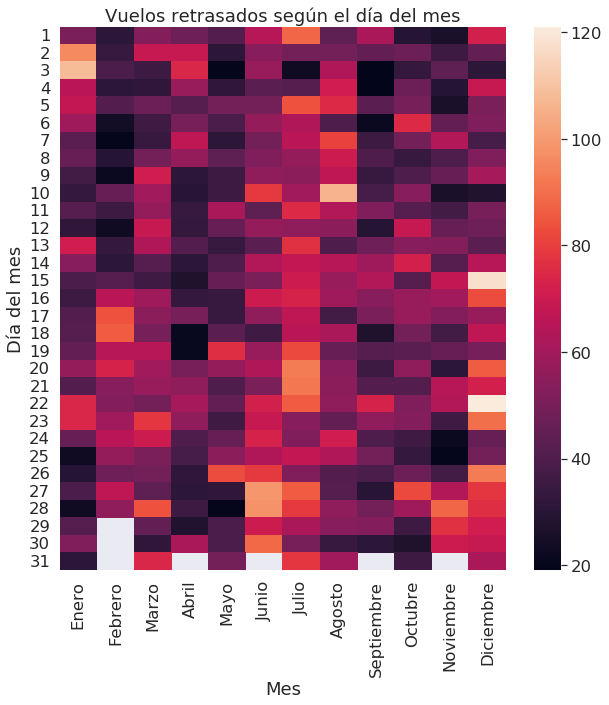

In [116]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.5)

flights = df.pivot_table(values='dep_delayed_int', index='DayofMonth', columns='Month', aggfunc='sum')

ax = sns.heatmap(flights)

# title
ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
                  rotation=90)
ax.set(title='Vuelos retrasados según el día del mes', xlabel='Mes', ylabel='Día del mes')

pip install squarify

In [117]:
delayed_by_destiny = df.groupby('Dest')['dep_delayed_int'].sum().to_frame().reset_index()

In [118]:
delayed_by_destiny[delayed_by_destiny['dep_delayed_int'] > 0]

,Dest,dep_delayed_int
0,ABE,17
1,ABI,8
2,ABQ,110
3,ABY,6
5,ACT,3
...,...,...
284,WRG,4
285,WYS,2
286,XNA,47
287,YAK,1


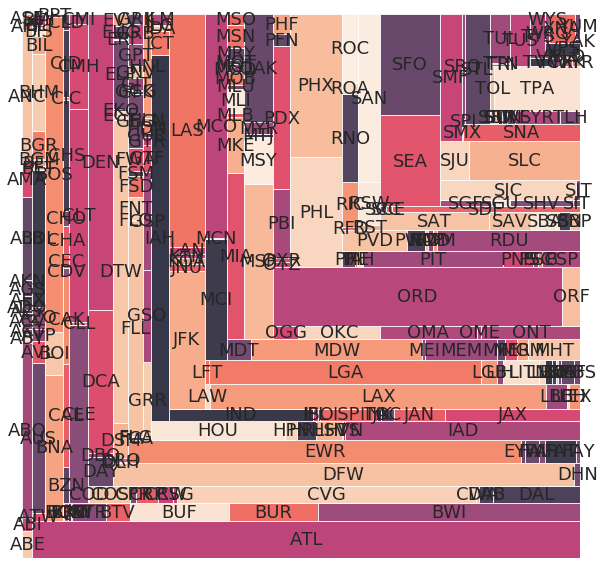

In [119]:
import squarify    # pip install squarify (algorithm for treemap)
df2 = delayed_by_destiny[delayed_by_destiny['dep_delayed_int'] > 0]
squarify.plot(sizes=df2['dep_delayed_int'], label=df2['Dest'], alpha=.8 )
plt.axis('off')
plt.show()

In [125]:
delayed_by_destiny = df.groupby('Dest').agg({'dep_delayed_int': 'sum', 'dep_delayed_15min': 'count'}).reset_index()

In [128]:
delayed_by_destiny.head(10)

,Dest,dep_delayed_int,dep_delayed_15min
0,ABE,17,71
1,ABI,8,30
2,ABQ,110,535
3,ABY,6,16
4,ACK,0,1
5,ACT,3,32
6,ACV,10,54
7,ACY,2,19
8,ADQ,3,7
9,AEX,6,40


In [129]:
delayed_by_destiny['dep_delayed_15min'].describe()

count     289.000000
mean      346.020761
std       739.527162
min         1.000000
25%        24.000000
50%        65.000000
75%       268.000000
max      5795.000000
Name: dep_delayed_15min, dtype: float64

In [131]:
most_delayed_destinations = delayed_by_destiny[delayed_by_destiny['dep_delayed_15min'] > 268]

In [132]:
most_delayed_destinations.head(10)

,Dest,dep_delayed_int,dep_delayed_15min
2,ABQ,110,535
14,ANC,83,310
17,ATL,1281,5795
19,AUS,116,612
23,BDL,106,519
28,BHM,60,305
33,BNA,168,847
35,BOS,364,1803
44,BUF,108,391
45,BUR,96,428


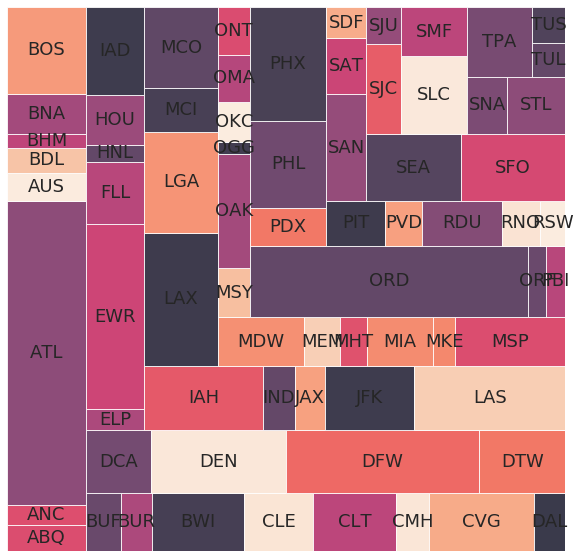

In [133]:
df3 = most_delayed_destinations
squarify.plot(sizes=df3['dep_delayed_int'], label=df3['Dest'], alpha=.8 )
plt.axis('off')
plt.show()

In [137]:
# df.groupby('Dest')['dep_delayed_int'].sum().to_frame().reset_index()
delayed_by_distance = df.groupby('Distance')['dep_delayed_int'].sum().to_frame().reset_index()

In [143]:
delayed_by_distance.head()

,Distance,dep_delayed_int
0,30,1
1,31,4
2,36,8
3,41,1
4,47,5


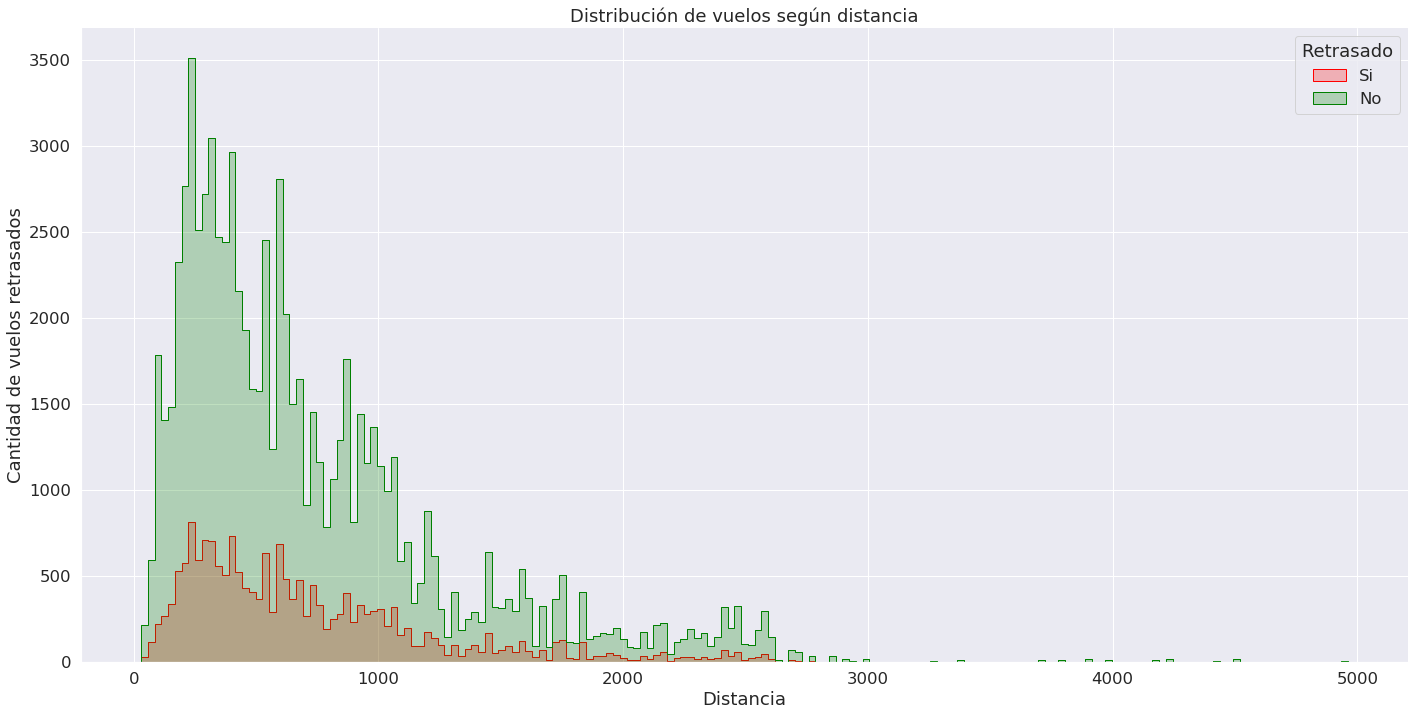

In [171]:
# df4 = delayed_by_distance

ax = sns.displot(df, x="Distance", 
            hue="dep_delayed_int", 
            element="step", legend=False, palette={False: 'green', True: 'red'}, height=10, aspect=20/10)
# ax.fig.set_dpi(80)
plt.legend(title='Retrasado', labels=['Si', 'No'])
ax.set(title='Distribución de vuelos según distancia', xlabel='Distancia', ylabel='Cantidad de vuelos retrasados')